# 01. Importing Libraries and DF

In [2]:
# Import libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
import scipy

In [3]:
# Verifying version
matplotlib.__version__

'3.7.0'

In [4]:
#Importing DF
path = r'C:\Users\William Inglish\Project 6 Liquor Sales'

df_sales = pd.read_csv(os.path.join(path,'02 Data', 'Prepared', 'Sales_Wrangled.csv'), index_col = 0)

In [4]:
#Verifying import
df_sales.head()

,invoice_and_item_number,date,store_number,store_name,address,city,zip_code,store_location,county_number,county_name,...,item_number,item_description,package_size,bottle_volume_ml,state_bottle_cost,state_bottle_retail,bottles_sold,sale_dollars,volume_sold_liters,volume_sold_gallons
0,INV-33179700135,2021-01-04,2576,Hy-Vee Wine and Spirits / Storm Lake,1250 N Lake St,Storm Lake,50588.0,POINT (-95.200758 42.65318400000001),11.0,BUENA VIST,...,64870,Fireball Cinnamon Whiskey,48,100,0.90,1.35,48,64.80,4.8,1.26
1,INV-33196200106,2021-01-04,2649,Hy-Vee #3 / Dubuque,400 Locust St,Dubuque,52001.0,POINT (-90.666497 42.49721900000001),31.0,DUBUQUE,...,65200,Tequila Rose Liqueur,12,750,11.50,17.25,4,69.00,3.0,0.79
2,INV-33184300011,2021-01-04,2539,Hy-Vee Food Store / Iowa Falls,640 S. Oak,Iowa Falls,50126.0,POINT (-93.262364 42.508752),42.0,HARDIN,...,38008,Smirnoff 80prf PET,6,1750,14.75,22.13,6,132.78,10.5,2.77
3,INV-33184100015,2021-01-04,4024,Wal-Mart 1546 / Iowa Falls,840 S Oak,Iowa Falls,50126.0,POINT (-93.262446 42.503407),42.0,HARDIN,...,36648,Caliber Vodka,12,750,3.31,4.97,12,59.64,9.0,2.37
4,INV-33174200025,2021-01-04,5385,Vine Food & Liquor,2704 Vine St.,West Des Moines,50265.0,POINT (-93.741511 41.580206),77.0,POLK,...,4626,Buchanan Deluxe 12YR,12,750,20.99,31.49,2,62.98,1.5,0.39


In [5]:
df_sales.columns

Index(['invoice_and_item_number', 'date', 'store_number', 'store_name',
       'address', 'city', 'zip_code', 'store_location', 'county_number',
       'county_name', 'category_code', 'category_name', 'vendor_number',
       'vendor_name', 'item_number', 'item_description', 'package_size',
       'bottle_volume_ml', 'state_bottle_cost', 'state_bottle_retail',
       'bottles_sold', 'sale_dollars', 'volume_sold_liters',
       'volume_sold_gallons'],
      dtype='object')

In [6]:
df_sales.shape

(2805307, 24)

# 02. Choosing variables for subset df

In [7]:
#Creating a correlation matrix
df_sales.corr()

C:\Users\William Inglish\AppData\Local\Temp\ipykernel_16820\1478771247.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_sales.corr()


,store_number,zip_code,county_number,category_code,vendor_number,item_number,package_size,bottle_volume_ml,state_bottle_cost,state_bottle_retail,bottles_sold,sale_dollars,volume_sold_liters,volume_sold_gallons
store_number,1.000000,-0.016087,-0.043552,0.007756,0.011714,-0.001165,0.113020,-0.147512,-0.043878,-0.043842,-0.002688,-0.036493,-0.040878,-0.040890
zip_code,-0.016087,1.000000,-0.054769,-0.005249,-0.010872,-0.003593,0.024880,-0.000293,-0.013398,-0.013389,0.000925,-0.004816,-0.000804,-0.000800
county_number,-0.043552,-0.054769,1.000000,-0.005137,-0.008433,0.000704,0.028719,-0.044674,0.000960,0.000974,0.022396,0.016334,0.007043,0.007036
category_code,0.007756,-0.005249,-0.005137,1.000000,0.029580,0.191190,-0.065665,-0.045750,0.104927,0.104942,-0.001480,0.002844,-0.005406,-0.005418
vendor_number,0.011714,-0.010872,-0.008433,0.029580,1.000000,0.072811,-0.027504,0.033688,-0.050535,-0.050623,0.036526,-0.012735,0.016686,0.016685
item_number,-0.001165,-0.003593,0.000704,0.191190,0.072811,1.000000,-0.054218,-0.062548,0.129533,0.129523,0.031469,0.041703,0.039907,0.039895
package_size,0.113020,0.024880,0.028719,-0.065665,-0.027504,-0.054218,1.000000,-0.471930,-0.336117,-0.336130,0.186991,-0.037069,-0.037439,-0.037454
bottle_volume_ml,-0.147512,-0.000293,-0.044674,-0.045750,0.033688,-0.062548,-0.471930,1.000000,0.147595,0.147605,-0.019317,0.074929,0.142820,0.142879
state_bottle_cost,-0.043878,-0.013398,0.000960,0.104927,-0.050535,0.129533,-0.336117,0.147595,1.000000,0.999819,-0.065699,0.096428,-0.003757,-0.003763
state_bottle_retail,-0.043842,-0.013389,0.000974,0.104942,-0.050623,0.129523,-0.336130,0.147605,0.999819,1.000000,-0.065704,0.096455,-0.003755,-0.003762


In [13]:
# Creating a subset of all fields that are able to correlate
df_sub = df_sales[['store_number', 'zip_code', 'county_number', 'category_code', 'vendor_number', 'item_number', 'package_size', 'bottle_volume_ml', 'state_bottle_cost',
                   'state_bottle_retail', 'bottles_sold', 'sale_dollars', 'volume_sold_liters', 'volume_sold_gallons']]

Text(0.5, 1.0, 'Correlation Matrix')

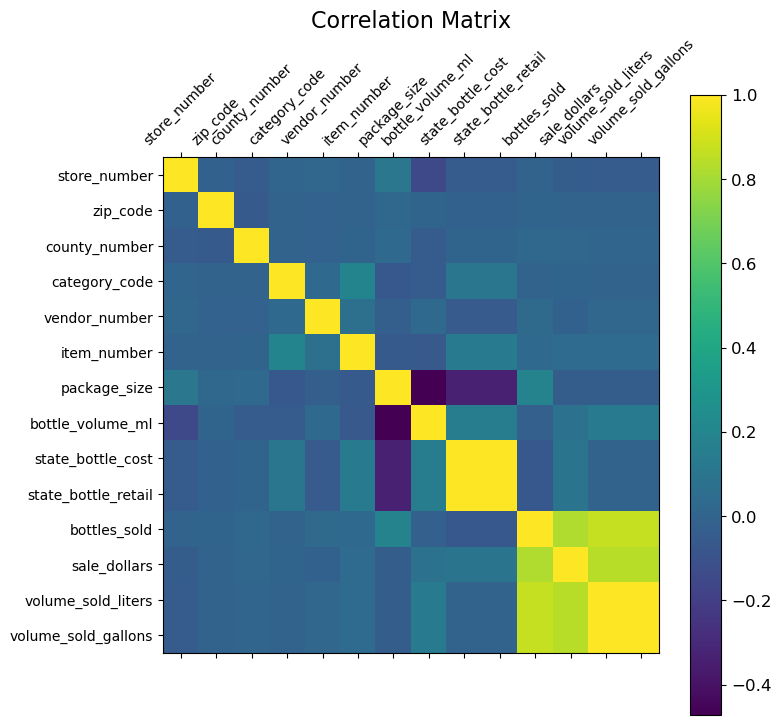

In [19]:
f = plt.figure(figsize=(8, 8)) # figure size 
plt.matshow(df_sub.corr(), fignum=f.number) # type of plot
plt.xticks(range(df_sub.shape[1]), df_sub.columns, fontsize=10, rotation=45) # x axis labels
plt.yticks(range(df_sub.shape[1]), df_sub.columns, fontsize=10) # y axis labels
cb = plt.colorbar() # add a colour legend (called colorbar)
cb.ax.tick_params(labelsize=12) # add font size
plt.title('Correlation Matrix', fontsize=16) # add title

This correlation doesn't consider all outliers being removed.

# 03. Creating colored correlation matrix heatmap

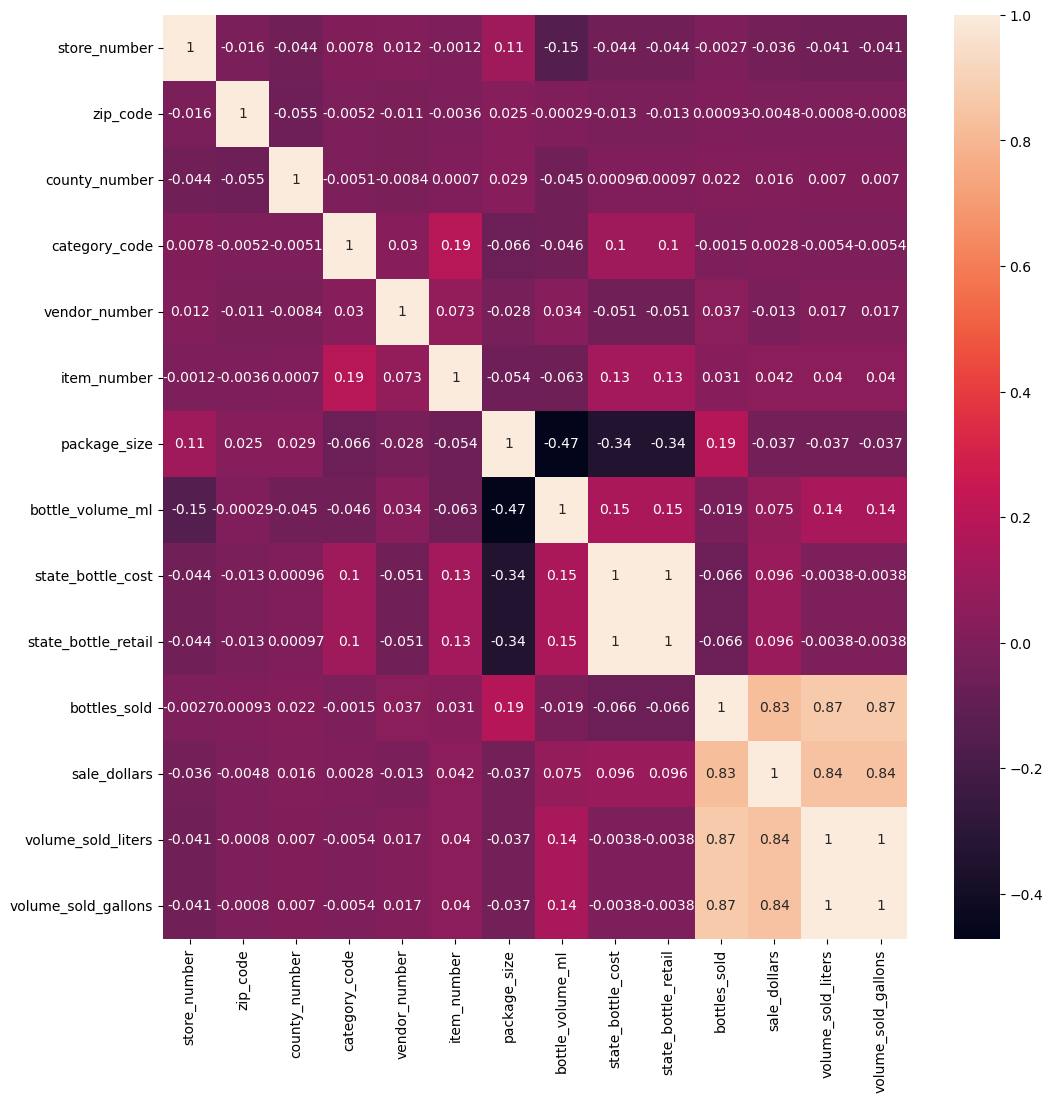

In [24]:
# Create a subplot with matplotlib
f,ax = plt.subplots(figsize=(12,12))

# Create the correlation heatmap in seaborn by applying a heatmap onto the correlation matrix and the subplots defined above.
corr = sns.heatmap(df_sub.corr(), annot = True, ax = ax) # The `annot` argument allows the plot to 
#place the correlation coefficients onto the heatmap.

We can see a postive correlation with state_bottle_retail and state_bottle_cost. This means that whenever the state(Alchoholic Beverages Division) pays for a bottle of liquor for a higher price, the retail value of the store will increase. This applies for a low retail value, this means the state will pay a lower price for the bottle of liquor.

We can ignore the positive correlation between the two different measurements of liquids since they are measurements, however it isn't suprising to see that the higher number of bottles sold and the higher cost of liquor ordered(sale_dollars), the higher the volumn will be.

Lastly, we can see a negative correlation between package size and the other variable: bottle_volume_ml, state_bottle_cost and state_bottle_retail. This can be interpreted as the smaller the package size then there will be a large ml size of the liquor bottle and a higher price the state paid for each bottle and the higher the price the store paid for each bottle of liquor ordered.

# 04. Creating scatter plots to examine relationships

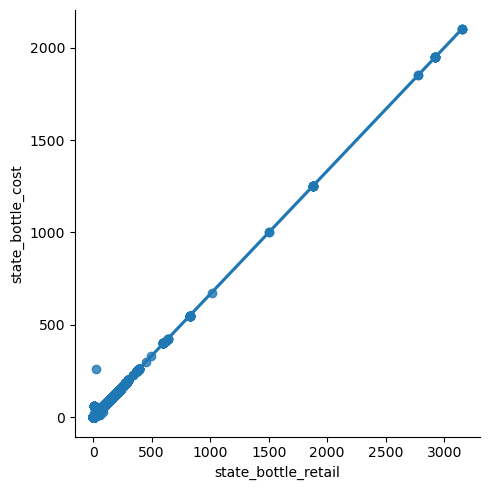

In [25]:
# Create a scatterplot for the "state_bottle_retail" and "state_bottle_cost" columns

sns.lmplot(x = 'state_bottle_retail', y = 'state_bottle_cost', data = df_sales)

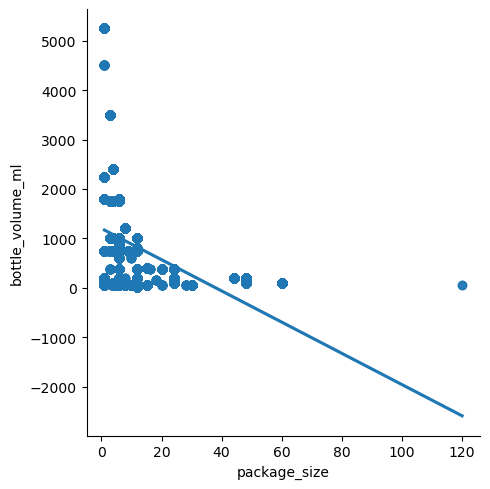

In [26]:
# Create a scatterplot for the "package_size" and "bottle_volume_ml" columns

sns.lmplot(x = 'package_size', y = 'bottle_volume_ml', data = df_sales)

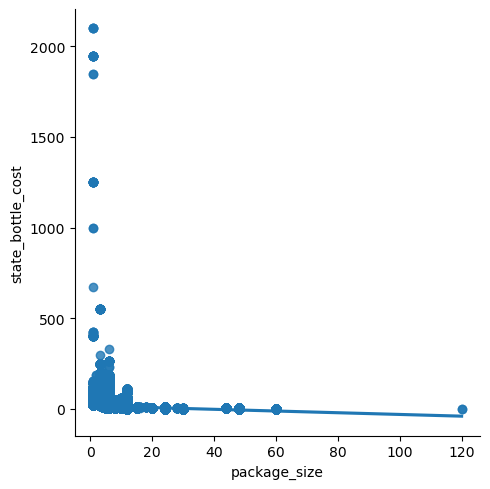

In [27]:
# Create a scatterplot for the "state_bottle_retail" and "state_bottle_cost" columns

sns.lmplot(x = 'package_size', y = 'state_bottle_cost', data = df_sales)

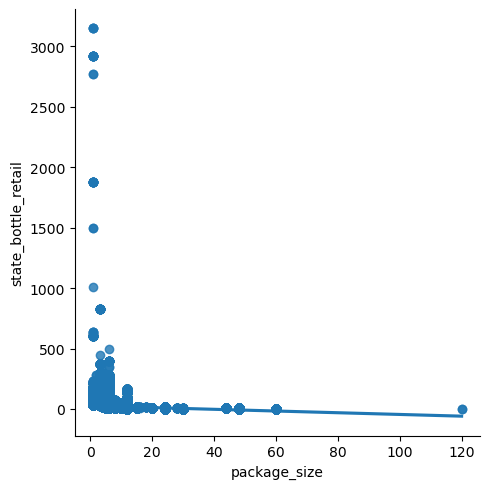

In [28]:
# Create a scatterplot for the "state_bottle_retail" and "state_bottle_cost" columns

sns.lmplot(x = 'package_size', y = 'state_bottle_retail', data = df_sales)

# 05. Creating pair plots for entire data set

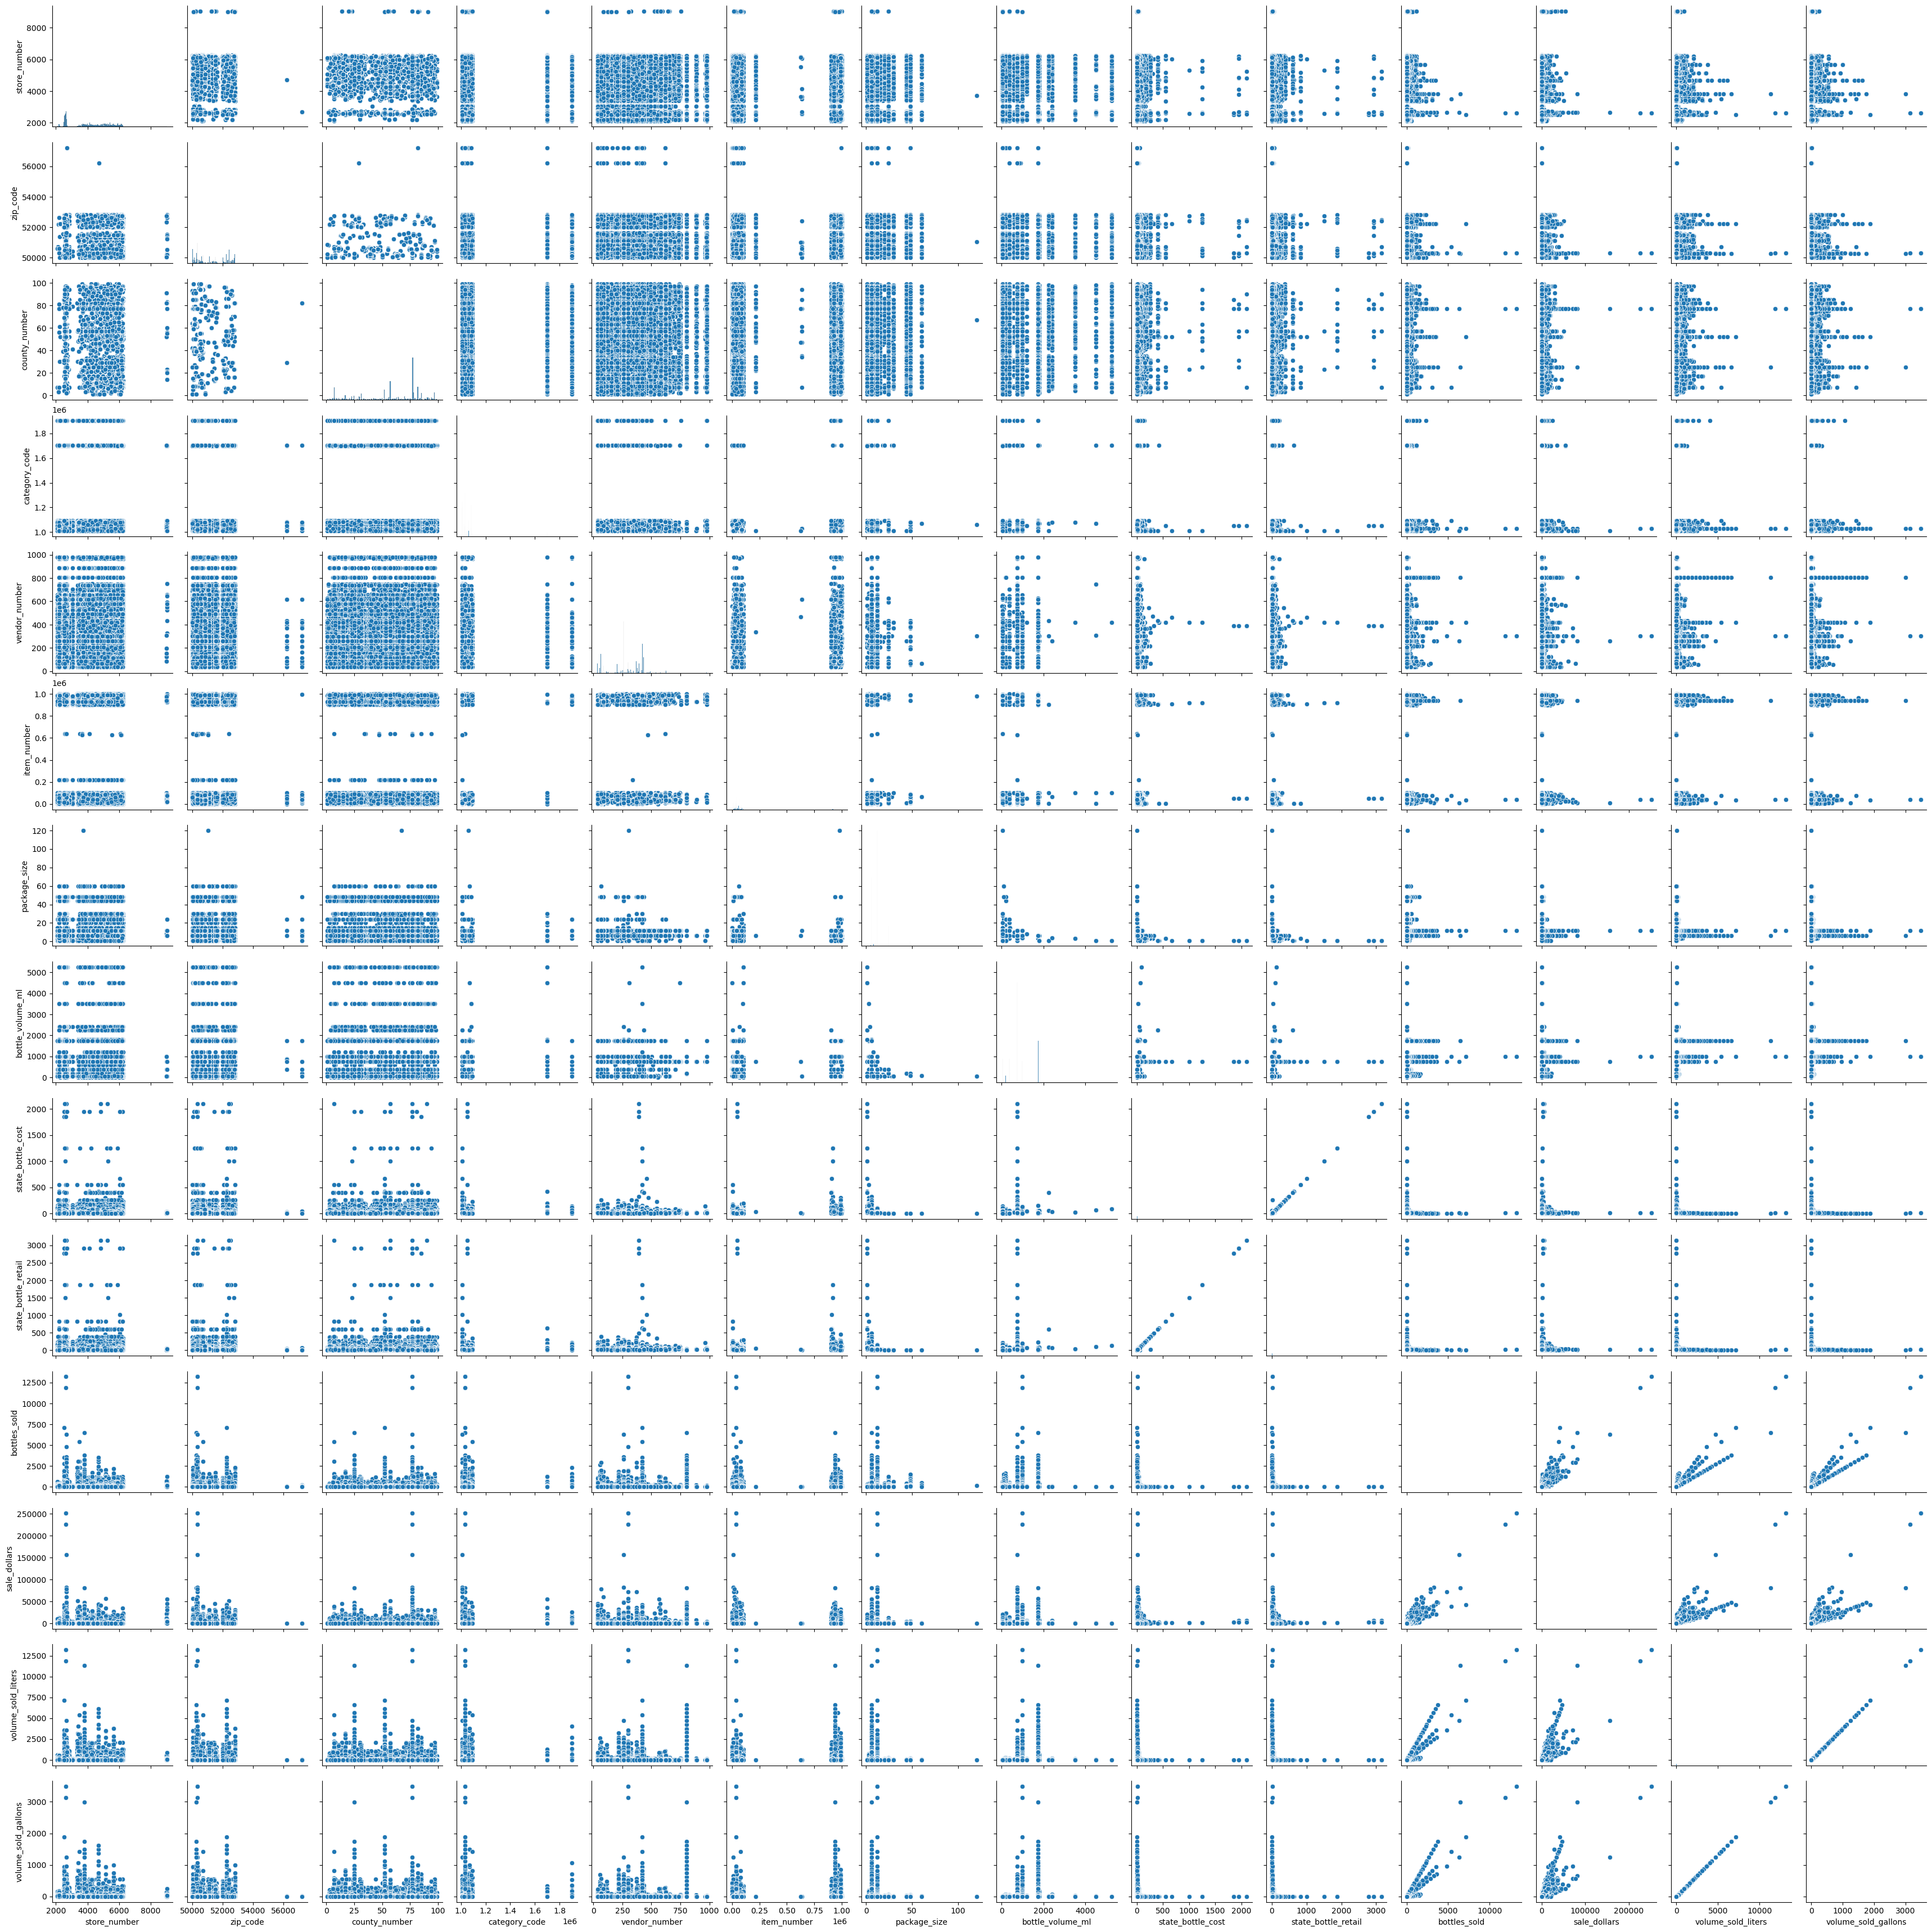

In [8]:
# Creating a pair plot of entire dataset
g = sns.pairplot(df_sales)

In [11]:
#Saving pairplot to examine further
g.savefig('pairplot.png')

We can see a correlation of the volume fields associated with the bottles sold and sale dollars, there are some outliers in the data set shown in the scatterplot.

There is an obvious negative correlation with package_size and bottle_volume_ml, as to be expected. The bigger the package size the less amount of volume in ml and vice-versa.

Other than those fields, there is nothing notable about the relationships.

# 06. Creating categorical plot

In [7]:
#Looking at columns to create a category from
df_sales.columns

Index(['invoice_and_item_number', 'date', 'store_number', 'store_name',
       'address', 'city', 'zip_code', 'store_location', 'county_number',
       'county_name', 'category_code', 'category_name', 'vendor_number',
       'vendor_name', 'item_number', 'item_description', 'package_size',
       'bottle_volume_ml', 'state_bottle_cost', 'state_bottle_retail',
       'bottles_sold', 'sale_dollars', 'volume_sold_liters',
       'volume_sold_gallons'],
      dtype='object')

In [13]:
df_sales.describe()

,store_number,zip_code,county_number,category_code,vendor_number,item_number,package_size,bottle_volume_ml,state_bottle_cost,state_bottle_retail,bottles_sold,sale_dollars,volume_sold_liters,volume_sold_gallons
count,2.805307e+06,2.805165e+06,2.805165e+06,2.805307e+06,2.805303e+06,2.805307e+06,2.805307e+06,2.805307e+06,2.805307e+06,2.805307e+06,2.805307e+06,2.805307e+06,2.805307e+06,2.805307e+06
mean,4.137796e+03,5.124374e+04,5.712714e+01,1.055993e+06,2.871833e+02,5.456197e+04,1.194263e+01,8.218059e+02,1.132500e+01,1.698823e+01,1.185837e+01,1.624497e+02,9.383131e+00,2.473141e+00
std,1.265248e+03,9.906550e+02,2.732875e+01,1.039322e+05,1.415585e+02,9.185349e+04,7.846285e+00,5.254814e+02,1.103231e+01,1.654628e+01,3.566817e+01,5.871846e+02,4.120727e+01,1.088601e+01
min,2.106000e+03,5.000200e+04,1.000000e+00,1.011000e+06,3.300000e+01,2.580000e+02,1.000000e+00,2.000000e+01,6.600000e-01,9.900000e-01,1.000000e+00,1.340000e+00,2.000000e-02,0.000000e+00
25%,2.644000e+03,5.031400e+04,3.100000e+01,1.012100e+06,2.050000e+02,2.712500e+04,6.000000e+00,3.750000e+02,6.000000e+00,9.000000e+00,3.000000e+00,4.200000e+01,1.500000e+00,3.900000e-01
50%,4.186000e+03,5.104000e+04,6.200000e+01,1.031200e+06,2.600000e+02,3.991600e+04,1.200000e+01,7.500000e+02,8.990000e+00,1.349000e+01,6.000000e+00,8.892000e+01,4.500000e+00,1.180000e+00
75%,5.244000e+03,5.230200e+04,7.700000e+01,1.062500e+06,4.200000e+02,6.525100e+04,1.200000e+01,1.000000e+03,1.400000e+01,2.100000e+01,1.200000e+01,1.665000e+02,1.050000e+01,2.770000e+00
max,9.049000e+03,5.722200e+04,9.900000e+01,1.901200e+06,9.780000e+02,9.999950e+05,1.200000e+02,5.250000e+03,2.098940e+03,3.148410e+03,1.320000e+04,2.509320e+05,1.320000e+04,3.487070e+03


In [16]:
# Looking at any outliers.
df_sales.nlargest(10, 'bottles_sold')

,invoice_and_item_number,date,store_number,store_name,address,city,zip_code,store_location,county_number,county_name,...,item_number,item_description,package_size,bottle_volume_ml,state_bottle_cost,state_bottle_retail,bottles_sold,sale_dollars,volume_sold_liters,volume_sold_gallons
1180138,INV-38045600132,2021-07-05,2633,Hy-Vee #3 / BDI / Des Moines,3221 SE 14th St,Des Moines,50320.0,POINT (-93.596754 41.554101),77.0,POLK,...,38177,Titos Handmade Vodka,12,1000,12.67,19.01,13200,250932.00,13200.0,3487.07
1384397,INV-35909600152,2021-04-19,2633,Hy-Vee #3 / BDI / Des Moines,3221 SE 14th St,Des Moines,50320.0,POINT (-93.596754 41.554101),77.0,POLK,...,38177,Titos Handmade Vodka,12,1000,12.67,19.01,13200,250932.00,13200.0,3487.07
1608319,INV-43470400126,2022-01-03,2633,Hy-Vee #3 / BDI / Des Moines,3221 SE 14th St,Des Moines,50320.0,POINT (-93.596756 41.553941),77.0,POLK,...,38177,Titos Handmade Vodka,12,1000,12.67,19.01,13200,250932.00,13200.0,3487.07
2355762,INV-40639800127,2021-10-04,2633,Hy-Vee #3 / BDI / Des Moines,3221 SE 14th St,Des Moines,50320.0,POINT (-93.596754 41.554101),77.0,POLK,...,38177,Titos Handmade Vodka,12,1000,12.67,19.01,11880,225838.80,11880.0,3138.36
2132422,INV-38732200001,2021-07-28,2512,Hy-Vee Wine and Spirits / Iowa City,1720 Waterfront Dr,Iowa City,52240.0,POINT (-91.53046300000001 41.642764),52.0,JOHNSON,...,36889,Barton Naturals,12,1000,3.97,5.96,7116,42411.36,7116.0,1879.84
1873838,INV-38493500002,2021-07-20,3814,Costco Wholesale #788 / WDM,7205 Mills Civic Pkwy,West Des Moines,50266.0,POINT (-93.806489 41.561342),25.0,Dallas,...,936600,Kirkland Signature American Vodka,6,1750,8.34,12.51,6480,81064.80,11340.0,2995.71
2365232,INV-40686700002,2021-10-05,2663,Hy-Vee Food Store / Urbandale,8701 Douglas,Urbandale,50322.0,POINT (-93.738989 41.630486),77.0,POLK,...,11296,Crown Royal,12,750,16.59,24.89,6300,156807.00,4725.0,1248.21
2740503,INV-41649200026,2021-11-04,3494,Sam's Club 6514 / Waterloo,210 East Tower Park Dr,Waterloo,50702.0,POINT (-92.353103 42.456374),7.0,BLACK HAWK,...,77487,Tortilla Gold DSS,12,1000,4.85,7.28,5376,39137.28,5376.0,1420.18
2362585,INV-40687800001,2021-10-05,2663,Hy-Vee Food Store / Urbandale,8701 Douglas,Urbandale,50322.0,POINT (-93.738989 41.630486),77.0,POLK,...,38176,Titos Handmade Vodka,12,750,10.00,15.00,4800,72000.00,3600.0,951.01
111601,INV-42027400001,2021-11-16,3814,Costco Wholesale #788 / WDM,7205 Mills Civic Pkwy,West Des Moines,50266.0,POINT (-93.805651 41.562369),25.0,Dallas,...,936600,Kirkland Signature American Vodka,6,1750,8.34,12.51,3780,47287.80,6615.0,1747.49


In [9]:
# Looking at categories counts
df_sales['category_name'].value_counts()

American Vodkas                         417975
Canadian Whiskies                       267593
Straight Bourbon Whiskies               203431
Whiskey Liqueur                         155690
American Flavored Vodka                 125930
Spiced Rum                              120999
Blended Whiskies                        120456
100% Agave Tequila                       94612
American Schnapps                        89943
Cocktails /RTD                           89274
Tennessee Whiskies                       79679
Imported Vodkas                          79102
American Brandies                        73629
American Cordials & Liqueur              69774
Flavored Rum                             68220
Cream Liqueurs                           60262
Imported Cordials & Liqueurs             59435
Mixto Tequila                            59195
White Rum                                56969
Imported Brandies                        53588
Temporary & Specialty Packages           50089
Imported Flav

# 7. Revisiting Exploratory Questions

## Questions I previously had

1.  Which liquor companies are popular in the state, county, and city level on average? Any changes during the 4 seasons? The top 3 liquor products in each season?
2.  When is revenue the lowest during the year? Are there any correlations to find the trends in sales over the year (I.e., Football games, promotions, etc....)?
3.  What is the average number of bottles of liquor ordered and the average cost from all stores? Any recommendations to market to stores?
4.  What will the forecast be for January and February bottles ordered in 2023 to the top 20 stores?


## Answers after reviewing the relationships

1. The possible top 3 liquor products are American Vodkas, Canadian Whiskies and Straight Bourbon Whiskies.
2. No trends visually shown through this correlation mapping.
3. Not answered yet
4. Will forecast later in Tableau

# 8. Defining Hypothesis/Hypotheses

1. With a bigger size of the liquors volume, the sales dollars will increase.